(In order to load the stylesheet of this notebook, execute the last code cell in this notebook)

# Yelp Reviews and Clustering

In this assignment, we will be working with the [Yelp dataset](http://cs-people.bu.edu/kzhao/teaching/yelp_dataset_challenge_academic_dataset.tar). You can find the format of the dataset [here](https://www.yelp.com/dataset_challenge).

First, we will look at Review Objects and perform some [sentiment analysis](http://sentiment.christopherpotts.net/) on the review text.

You will need to preprocess the text using a stemming algorithm. The Porter stemming algorithm is a well-known one. Then, use a lexicon to assign a score to a review based on the positive/negative words you find in the text. You can find various lexicons [here](http://sentiment.christopherpotts.net/lexicons.html).

After you have assigned scores to the reviews based on the text analysis, compare your scores with the stars associated with the reviews. **(20 pts)**

In [51]:
import json
import nltk
from string import punctuation
from nltk.stem import PorterStemmer
dictionary = {}
with open('positive-words.txt') as positive:
    for item in positive:
        dictionary.update({item.replace('\n',''):1})
with open('negative-words.txt') as negative:
    for item in negative:
        dictionary.update({item.replace('\n',''):-1})

In [54]:
import pandas as pd
% matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from nltk.stem import PorterStemmer
stemming = PorterStemmer()
actual_stars = []
stars_review = []
df = pd.DataFrame()
with open('yelp_academic_dataset_review.json') as bff:
    for line in bff:
        jsonData = json.loads(line)
        actual_stars.append(float(jsonData["stars"]))
        review = jsonData["text"]
        count = 0   
        r_score = 0
        
        for item in review.split(' '):
            sWord = stemming.stem(item)
            if dictionary.get(sWord.lower()):
                r_score += dictionary.get(sWord.lower())
                count += 1
        if count != 0:
            new_score = float(r_score)/count
            score_star = new_score*2+3
            round_star = round(score_star)
        else:
            round_star = 3.0
        stars_review.append(round_star)
final={"Actual_Rating":actual_stars,"Predicted_Rating":stars_review}
df = pd.DataFrame(final)

d33=df.sort_values(['Actual_Rating', 'Predicted_Rating'], ascending=[True,True])
d33.index = range(1,len(d33) + 1)


Visualization and short (detailed) analysis. **(10 pts)**

0.987222346805
Actual_Rating            0
Predicted_Rating         0
diff                819662
dtype: int64


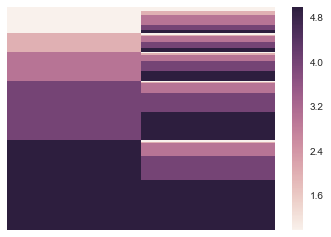

In [56]:
import pandas as pd
% matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.heatmap(d33, xticklabels=False, yticklabels=False, linewidths=0)

d34=d33
zero = 0 
d34['diff']= abs(d34['Actual_Rating'] - d34['Predicted_Rating'])
print d34['diff'].mean()
zero = (d34 == 0).astype(int).sum(axis=0)
print zero


-----------------

Above we can see a heat map which basically shows how many of the value are matching. I calculated the average distance between the actual stars given in the review and the stars predicted by me using the review text and there is a average difference of 0.98. Which Implies that my predictions are within +1 and -1 of the actual value.
Overall 819662 values out of the total number of review stars are exactly matching where as the others have a little error (+1,-1).

The error I'm getting here can be beacuse of multiple reasons. First of all my lexicon doesnt contain all the words thatare being used in the review. There are around 200 reviews that do not match any work from my lexicon thus they get a average score of 3, which is an assumption. Secondly, there are reviews where the customer has written relly long paragraphs and have used a lot of words including good and bad. For example even 'but' is a negtive word which will reduce the score. Even reviews with 5 star have some negatives words but the customer has given 5 star stating for example 'although something was not good it was overall and good experience'

Now, let's look at Business Objects. Try to find culinary districts in Las Vegas. These are characterized by closeness and similarity of restaurants. Use the "longitude" and "latitude" to cluster closeness. Use "categories" and "attributes" to cluster for similarity.

Find clusters using the 3 different techniques we discussed in class: k-means++, hierarchical, and GMM. Explain your data representation and how you determined certain parameters (for example, the number of clusters in k-means++). **(30 pts)**

Things you may want to consider:
1. The spatial coordinates and restaurant categories/attributes have different units of scale. Your results could be arbitrarily skewed if you don't incorporate some scaling.
2. Some restaurant types are inherently more common than others. For example, there are probably lots of "pizza" restaurants. You may want to normalize your vectors so that you don't end up with only clusters of "pizza" restaurants.

In [4]:
import json
import pandas as pd
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

datab=[]
data2= []
dictb = {}
jsondictadd = {}
address = {}
catdata= []
attdata= []
latdata= []
longdata= []
with open('yelp_academic_dataset_business.json') as bf:
    for line in bf:
        jsonData = json.loads(line)
        jsondictadd['address'] = jsonData['full_address']
        jsondictadd['category'] = jsonData['categories']
        category = jsondictadd['category']
        address = jsondictadd['address']
        if 'Las Vegas' in address:
            if 'Restaurants' in category:
                dictb = {}
                dictb['id'] =  jsonData['business_id']
                dictb['latitude'] = jsonData['latitude']
                dictb['longitude'] = jsonData['longitude']
                dictb['category'] = jsonData['categories']
                dictb['attribute'] = jsonData['attributes']
                attribute= dictb['attribute']
                longitude = dictb["longitude"]
                lattitude = dictb["latitude"]
                catdata.append(category)
                attdata.append(attribute)
                datab.append(dictb)
                longdata.append(longitude)
                latdata.append(lattitude)

category = []
for k in range(len(catdata)):
    value = ' '.join(catdata[k])
    category.append(value)
attribute = []
for k in range(len(attdata)):
    value = ' '.join(attdata[k])
    attribute.append(value)
data2 ={"Longitude":longdata,"Latitude":latdata,"Attributes":attribute,"categories":category} 


dfb = pd.DataFrame.from_records(data2)
print dfb

                                             Attributes   Latitude  \
0     Delivery Take-out Price Range Outdoor Seating ...  36.193609   
1     Take-out Accepts Credit Cards Price Range Outd...  36.209626   
2     Alcohol Noise Level Music Attire Ambience Good...  36.240425   
3     Take-out Caters Delivery Takes Reservations Ac...  36.196344   
4     Delivery Take-out Drive-Thru Outdoor Seating P...  36.196263   
5     Take-out Accepts Credit Cards Drive-Thru Alcoh...  36.195700   
6     Take-out Accepts Credit Cards Drive-Thru Outdo...  36.240289   
7     Take-out Accepts Credit Cards Drive-Thru Outdo...  36.239855   
8     Take-out Drive-Thru Outdoor Seating Noise Leve...  36.239805   
9     Alcohol Noise Level Music Attire Ambience Good...  36.240705   
10    Drive-Thru Alcohol Noise Level Has TV Attire A...  36.195940   
11    Take-out Accepts Credit Cards Price Range Outd...  36.218586   
12    Take-out Takes Reservations Delivery Outdoor S...  36.196063   
13    Delivery Good 

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
%matplotlib inline

countVector = CountVectorizer(min_df=1)


dfcate=pd.DataFrame(countVector.fit_transform(dfb.categories).toarray(), columns=countVector.get_feature_names())

dflist = pd.concat([dfb['Latitude'],dfb['Longitude'],dfcate['chinese'],dfcate['indian'],dfcate['american'],dfcate['mexican'],dfcate['mediterranean'],dfcate['italian'],dfcate['asian'],dfcate['bars'],dfcate['nightlife']],axis=1)

dflist['Latitude'] = dflist['Latitude'].apply(lambda x: ((x-dflist['Latitude'].min())*2)/(dflist['Latitude'].max()-dflist['Latitude'].min()))
dflist['Longitude'] = dflist['Longitude'].apply(lambda x: ((x-dflist['Longitude'].min())*2)/(dflist['Longitude'].max()-dflist['Longitude'].min()))

print dflist


      Latitude  Longitude  chinese  indian  american  mexican  mediterranean  \
0     1.267849   0.222946        0       0         0        0              0   
1     1.356592   1.136215        0       0         0        1              0   
2     1.527228   1.089824        0       0         1        0              0   
3     1.283002   1.146251        0       0         0        0              0   
4     1.282550   1.074710        0       0         0        0              0   
5     1.279433   1.084218        0       0         0        0              0   
6     1.526474   1.079455        0       0         1        0              0   
7     1.524071   1.194734        0       0         0        0              0   
8     1.523791   1.191621        0       0         0        0              0   
9     1.528777   1.190580        0       0         0        1              0   
10    1.280763   1.088254        0       0         0        1              0   
11    1.406230   1.206956        0      

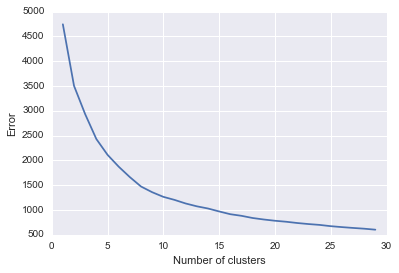

In [7]:
# we are plotting to see the number of clusters to be taken to get less error

import numpy as np
mis = np.zeros(30)
mis[0] = 0;
for key in range(1,30):
    kmeans = KMeans(init='k-means++', n_clusters=key, n_init=100)
    kmeans.fit_predict(dflist)
    mis[key] = kmeans.inertia_

plt.plot(range(1,len(mis)),mis[1:])
plt.xlabel('Number of clusters')
plt.ylabel('Error')

In [8]:
# looking at the graph above I am taking 10 clusters

kmeans = KMeans(init='k-means++', n_clusters=10, n_init=100)
kmeans.fit_predict(dflist)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
mis = kmeans.inertia_
print "Total error in clustering is: ", mis

Total error in clustering is:  1268.81615477


In [9]:
# kmeans++ clustering 
dfclus = pd.DataFrame.copy(dflist)
dfclus['labels'] = labels
dfclus=dfclus.drop('Latitude',axis=1)
dfclus=dfclus.drop('Longitude',axis=1)
dfclus['Latitude'] = dfb['Latitude']
dfclus['Longitude'] = dfb['Longitude']

df_dict1 = {}
for key in range(0,10):
    df_dict1[key]=(dfclus[dfclus['labels'] == key])


In [14]:
#gmm clustering

import numpy as np
from scipy import linalg
from sklearn import mixture
import gmplot

arr = dflist.as_matrix()
gmm = mixture.GMM(n_components=10, covariance_type='diag')
gmm.fit(arr)
aa = gmm.predict(arr)

dfgmm = pd.DataFrame.copy(dflist)
dfgmm['labels'] = aa
dfgmm=dfgmm.drop('Latitude',axis=1)
dfgmm=dfgmm.drop('Longitude',axis=1)
dfgmm['Latitude'] = dfb['Latitude']
dfgmm['Longitude'] = dfb['Longitude']
df_dict2 = {}
for key in range(0,10):
    df_dict2[key]=(dfgmm[dfgmm['labels'] == key])


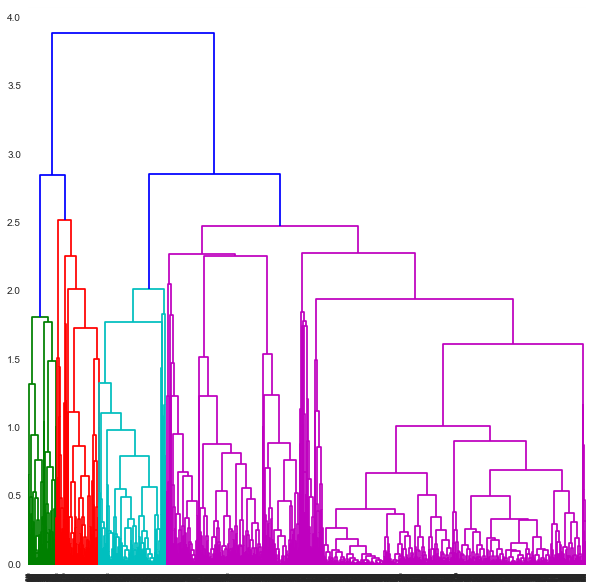

In [91]:
# Hierarchical Clustering dendrogram

%matplotlib inline
import scipy.sparse.linalg as linalg
import scipy.cluster.hierarchy as hr
import matplotlib.pyplot as plt

Z = hr.linkage(arr, method='complete', metric='euclidean')
fig = plt.figure(figsize=(10,10))
T = hr.dendrogram(Z,leaf_font_size=4)
fig.show()

Visualize your clusters using each technique. Label your clusters. **(10 pts)**

In [ ]:
import itertools
import gmplot
gmap = gmplot.GoogleMapPlotter(36, -115, 10)
colors = itertools.cycle(["r", "b", "g","y","c","k","m","#800080","#008080", "#d2691e"])

#plotting kmeann++ clusters

for key in range(0,10):
    c=next(colors)
    gmap.scatter(df_dict1[key].Latitude,df_dict1[key].Longitude, c=c, marker=False, Label= key)

gmap.draw("kmeansplot.html")

# plotting gmm clusters
for key in range(0,10):
    c=next(colors)
    gmap.scatter(df_dict2[key].Latitude,df_dict2[key].Longitude, c=c, marker=False, Label = key)


gmap.draw("gmmplot.html")


The plots are uploaded on the github repo. The key for the kmeans++ plot is given here:
    Label-0 : Color-red      : Mexican Food
    Label-1 : Color-blue     : Resturents with nightlife
    Label-2 : Color-green    : Resturents famous for bar
    Label-3 : Color-yellow   : Indian Food
    Label-4 : Color-cyan     : American Food
    Label-5 : Color-black    : Resturents with nightlife and bar
    Label-6 : Color-magenta  : Asian Food
    Label-7 : Color-purple   : American Food with bar and nightlife
    Label-8 : Color-sea green: Chinese Food
    Label-9 : Color-Cinnamon : Italian Food
        

The plots are uploaded on the github repo. The key for the gmm plot is given here:
    Label-0 : Color-red      : mediterranean Food 
    Label-1 : Color-blue     : American Food with bar
    Label-2 : Color-green    : Mexican Food
    Label-3 : Color-yellow   : American Food
    Label-4 : Color-cyan     : Italian Food
    Label-5 : Color-black    : Chinese Food
    Label-6 : Color-magenta  : Resturents with nightlife and bar
    Label-7 : Color-purple   : Resturents famous for its bar
    Label-8 : Color-sea green: Indian Food
    Label-9 : Color-Cinnamon : Asian Food
        

Now let's detect outliers. These are the ones who are the farthest from the centroids of their clusters. Track them down and describe any interesting observations that you can make. **(10 pts)**

Give a short (detailed) analysis comparing the 3 techniques. **(10 pts)**

k-means++ clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. It works by iteratively reassigning data points to clusters and computing cluster centers based on the average of the point locations. The k-means++ algorithm gives a procedure to initialize the cluster centers before proceeding with the standard k-means optimization iterations. With the k-means++ initialization, the algorithm is guaranteed to find a solution that is O(log k) competitive to the optimal k-means solution.

Hierarchical Clustering finds a pair of clusters to merge into a new cluster that has the shortest cluster distance.
In this partitions can be visualized using a tree structure (a dendrogram), it does not need the number of clusters as input to start with. With Hierarchical Clustering it is possible to view partitions at different levels of granularities (i.e., can refine/coarsen clusters) using different K.

A Gaussian mixture model can be viewed as a mixture of heterogenous populations whose underlying mean follows a Gaussian distribution, in GMM each cluster has their own independent mean and covariance. Furthermore k-means performs hard assignments of data points to clusters whereas in GMM we get a collection of independant gaussian distributions, and for each data point we have a probability that it belongs to one of the distributions.


-----------------

In [93]:
# Code for setting the style of the notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()